Testing sink hole delineation using the 1/3 arcsecond 10m 3DEP elevation dataset for the Woods Canyon 15 minute quad.

Data from the Science Data Catalog

**Dataset:** [1/3 arc-second Digital Elevation Models (DEMS) - USGS National Map 3DEP Downloadable Data Collection](https://data.usgs.gov/datacatalog/data/USGS:3a81321b-c153-416f-98b7-cc8e5f0e17c3)

**Description:** 
This is a tiled collection of the 3D Elevation Program (3DEP) and is 1/3 arc-second (approximately 10 m) resolution. The 3DEP data holdings serve as the elevation layer of The National Map, and provide foundational elevation information for earth science studies and mapping applications in the United States. Scientists and resource managers use 3DEP data for hydrologic modeling, resource monitoring, mapping and visualization, and many other applications. The elevations in this DEM represent the topographic bare-earth surface. The seamless 1/3 arc-second DEM layers are derived from diverse source data that are processed to a common coordinate system and unit of vertical measure. These data are distributed in geographic coordinates in units of decimal degrees, and in conformance with the North American Datum of 1983 (NAD 83). All elevation values are in meters and, over the continental United States, are referenced to the North American Vertical Datum of 1988 (NAVD88). The seamless 1/3 arc-second DEM layer provides coverage of the conterminous United States, Hawaii, Puerto Rico, other territorial islands, and in limited areas of Alaska. The seamless 1/3arc-second DEM is available as pre-staged current and historical products tiled in GeoTIFF format. The seamless 1/3 arc-second DEM layer is updated continually as new data become available in the current folder. Previously created 1 degree blocks are retained in the historical folder with an appended date suffix (YYYMMDD) when they were produced. Other 3DEP products are nationally seamless DEMs in resolutions of 1, and 2 arc seconds. These seamless DEMs were referred to as the National Elevation Dataset (NED) from about 2000 through 2015 at which time they became the seamless DEM layers under the 3DEP program and the NED name and system were retired. Other 3DEP products include one-meter DEMs produced exclusively from high resolution light detection and ranging (lidar) source data and five-meter DEMs in Alaska as well as various source datasets including the lidar point cloud and interferometric synthetic aperture radar (Ifsar) digital surface models and intensity images. All 3DEP products are public domain.

In [16]:
#| echo: false
## install required libraries if not already installed 
#!pip install rasterio geopandas matplotlib
!pip install whitebox -U


**rasterio:** A library used for reading and writing geospatial raster data (such as DEMs), with support for masking, reprojecting, and manipulating raster datasets.

**geopandas:** An extension of pandas that simplifies working with geospatial data, enabling easy reading, writing, and manipulation of vector data such as shapefiles.

**matplotlib:** A popular plotting library in Python, used for creating static, animated, and interactive visualizations, including map displays and colormaps for DEMs.

In [4]:
import rasterio
import geopandas as gpd
from rasterio.mask import mask
from rasterio.plot import show  
import matplotlib.pyplot as plt
from matplotlib.colors import LightSource
from shapely.geometry import box

In [5]:
dem_url = "https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n35w111/USGS_13_n35w111_20240402.tif"
shapefile_path = r"G:\Data\Arizona_HUC08plus\Elevation\WoodsCanyonQuad\WoodsCanyonQuad.shp"


In [6]:
# Step 1: Load the DEM from the National Map
#dem_url = "https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n35w111/USGS_13_n35w111_20240402.tif"

with rasterio.open(dem_url) as src:
    dem_data = src.read(1)
    dem_meta = src.meta

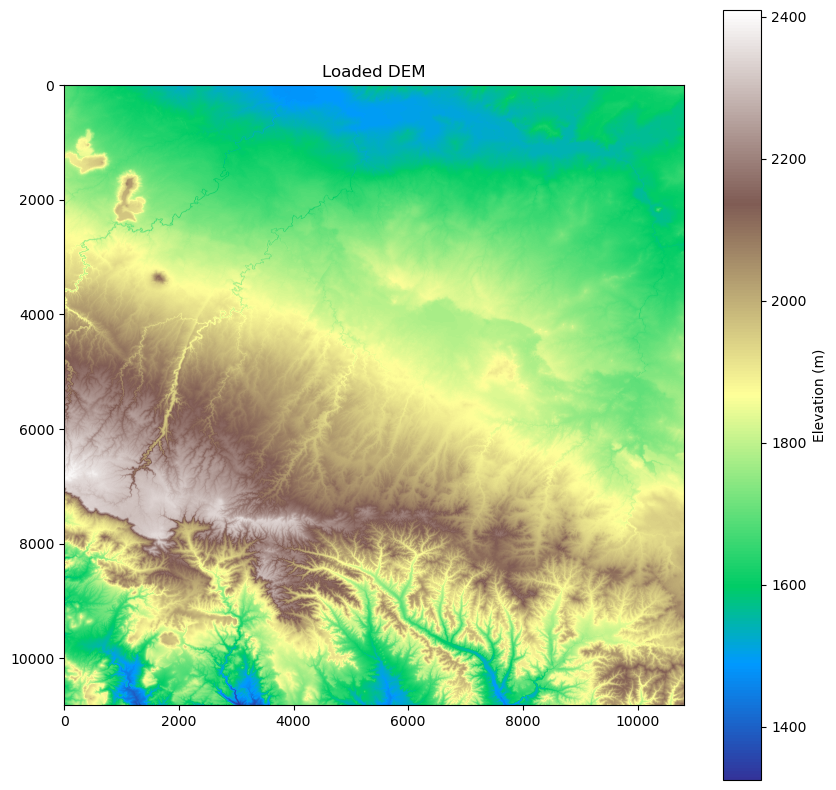

In [7]:
# Plot the DEM using imshow to allow colorbar creation
plt.figure(figsize=(10, 10))
plt.title("Loaded DEM")
plt.imshow(dem_data, cmap='terrain')
plt.colorbar(label='Elevation (m)')
plt.show()

In [8]:
# Step 2: Load the shapefile for masking
#shapefile_path = r"G:\Data\Arizona_HUC08plus\Elevation\WoodsCanyonQuad\WoodsCanyonQuad.shp"
shape_data = gpd.read_file(shapefile_path)

# Reproject the shapefile to the DEM's CRS (if necessary)
shape_data = shape_data.to_crs(dem_meta['crs'])

# Check if shapefile bounds intersect DEM bounds
dem_bounds = src.bounds
shape_bounds = shape_data.total_bounds
if not box(*dem_bounds).intersects(box(*shape_bounds)):
    print("Shapefile and DEM do not overlap. Please check the coordinates.")
else:
    print("Shapefile and DEM overlap.")

print("DEM bounds:", src.bounds)
print("Shapefile bounds:", shape_data.total_bounds)

Shapefile and DEM overlap.
DEM bounds: BoundingBox(left=-111.00055555639324, bottom=33.99944444340724, right=-109.99944444420515, top=35.000555556494646)
Shapefile bounds: [-111.00000001   34.24999995 -110.75000001   34.49999995]


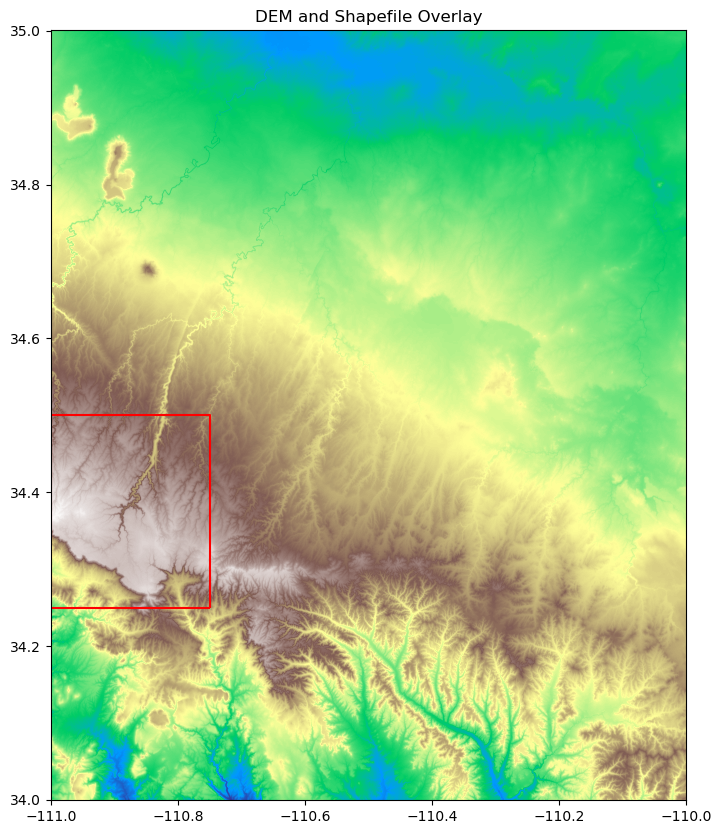

In [9]:
# Step 3: Plot the DEM and shapefile to check overlap
plt.figure(figsize=(10, 10))
plt.title("DEM and Shapefile Overlay")

# Plot the DEM
plt.imshow(dem_data, cmap='terrain', extent=[src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top])

# Plot the shapefile geometry
shape_data.boundary.plot(ax=plt.gca(), color='red')
plt.show()

### Using the *Whitebox_tools.py* script

[Guide](https://www.whiteboxgeo.com/manual/wbt_book/python_scripting/using_whitebox_tools.html)

In [12]:
from whitebox_tools import WhiteboxTools

wbt = WhiteboxTools()


ModuleNotFoundError: No module named 'whitebox_tools'